<a href="https://colab.research.google.com/github/aryan802/EDA_Project_Collab_Notebook/blob/main/Phase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---- Submission Header ----

Reg. No.  - 22BDS0266

Name of the Student - Aryan Jain

Dataset link - https://raw.githubusercontent.com/salemprakash/EDA/main/Data/credit%20card.csv

Github link: https://github.com/aryan802/EDA_Project_Collab_Notebook


In [ ]:
# ---------- Imports ----------
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score,
confusion_matrix, classification_report, roc_auc_score, roc_curve
)

In [ ]:
# ---------- Helper functions ----------


def show_confusion_matrix(y_true, y_pred, labels=[0,1], title='Confusion Matrix'):
  cm = confusion_matrix(y_true, y_pred, labels=labels)
  plt.figure(figsize=(5,4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(title)
  plt.show()

In [ ]:
# ---------- 1. Load dataset ----------
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/credit%20card.csv"
df = pd.read_csv(url, na_values=['?', 'NA', ''])
print('Dataset loaded. Shape:', df.shape)
print('\nColumns and dtypes:')
print(df.dtypes)


# Print first rows
print('\nFirst 5 rows:')
print(df.head())

Dataset loaded. Shape: (5000, 14)

Columns and dtypes:
ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan         float64
Securities Account    float64
CD Account            float64
Online                  int64
CreditCard            float64
dtype: object

First 5 rows:
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loa

In [ ]:
# ---------- 2. Data Cleaning and Handling ----------
print('\n--- Missing values (before) ---')
print(df.isnull().sum())


# Convert obvious object columns that should be numeric (if any)
# Ensure Personal Loan is present
if 'Personal Loan' not in df.columns:
  raise ValueError('Target column `Personal Loan` not found in dataset')


# Separate numeric and categorical
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print('\nNumeric cols:', numeric_cols)
print('Categorical cols:', cat_cols)


# Impute numeric with median, categorical with mode
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')


df[numeric_cols] = pd.DataFrame(num_imputer.fit_transform(df[numeric_cols]),
columns=numeric_cols)
if cat_cols:
  df[cat_cols] = pd.DataFrame(cat_imputer.fit_transform(df[cat_cols]),
columns=cat_cols)


# Ensure target has no NaN and is integer
print('\nMissing values (after imputation):')
print(df.isnull().sum())
df = df.dropna(subset=['Personal Loan'])
df['Personal Loan'] = df['Personal Loan'].astype(int)


print('\nValue counts (target):')
print(df['Personal Loan'].value_counts())


# Remove ID/ZIP if not useful
if 'ID' in df.columns:
  df = df.drop(columns=['ID'])
if 'ZIP Code' in df.columns:
  df = df.drop(columns=['ZIP Code'])


print('\nShape after dropping ID/ZIP:', df.shape)


--- Missing values (before) ---
ID                     0
Age                    0
Experience             0
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan         11
Securities Account     1
CD Account             2
Online                 0
CreditCard             1
dtype: int64

Numeric cols: ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
Categorical cols: []

Missing values (after imputation):
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Value count


--- 1D Visualizations (histograms / countplots) ---


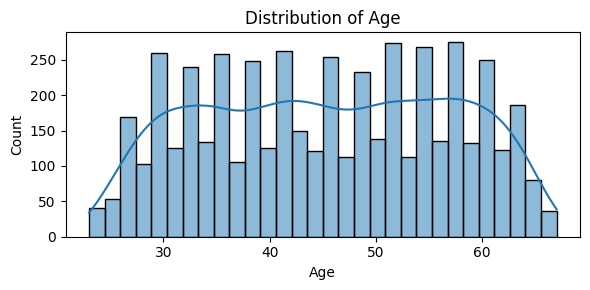

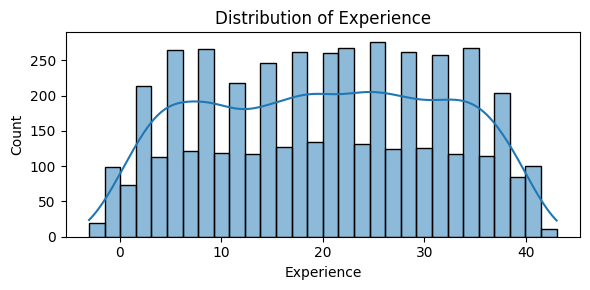

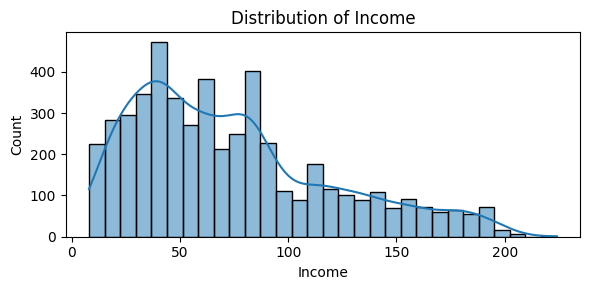

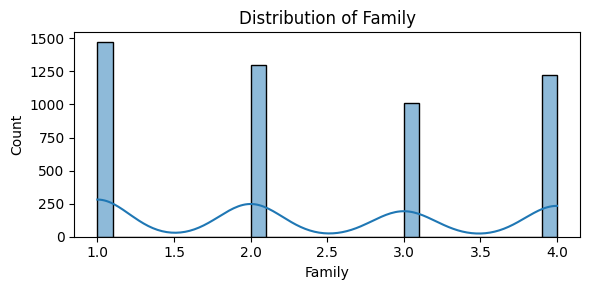

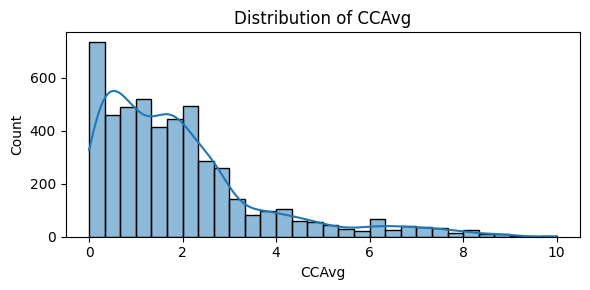

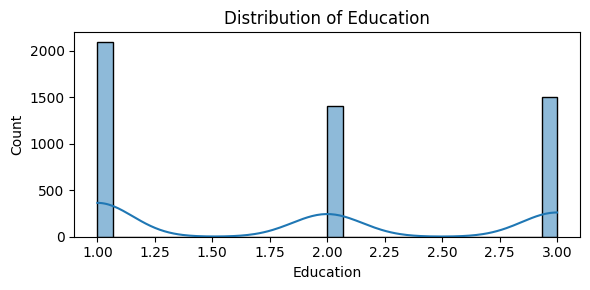

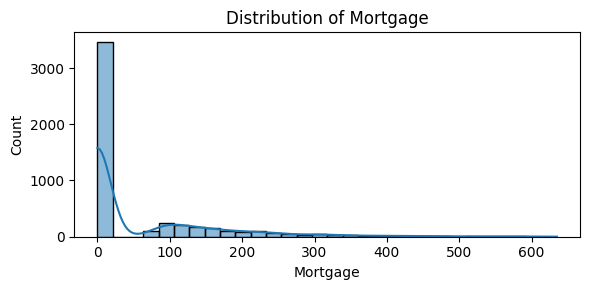

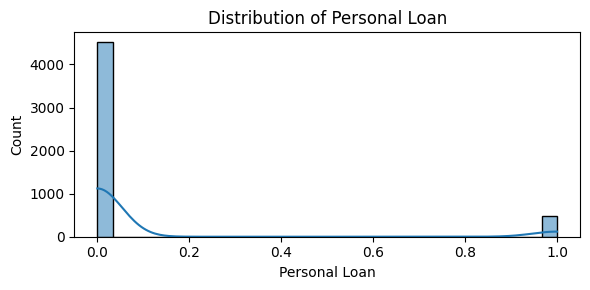

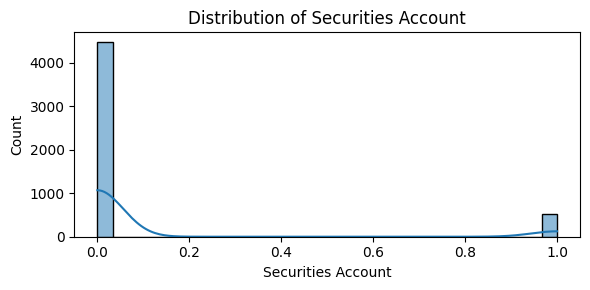

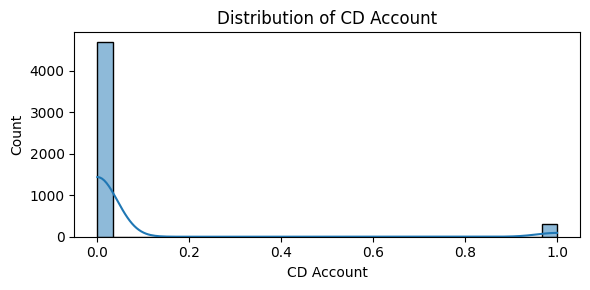

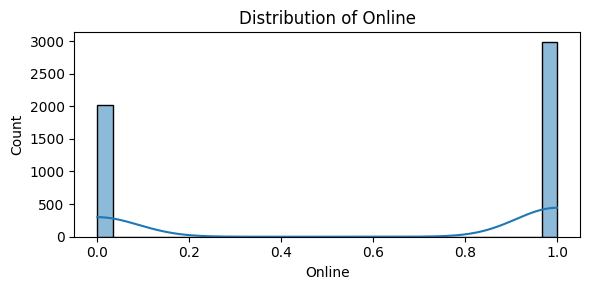

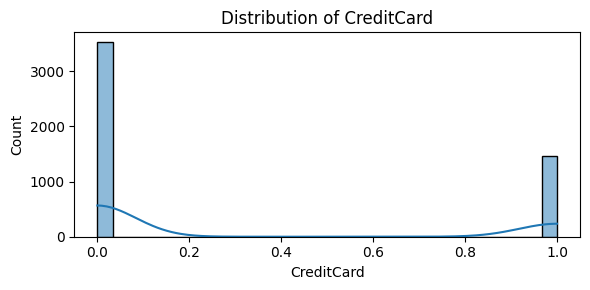

In [ ]:
# ---------- 3. 1D Visualizations (Distributions) ----------
print('\n--- 1D Visualizations (histograms / countplots) ---')
for col in df.select_dtypes(include=[np.number]).columns:
  plt.figure(figsize=(6,3))
  sns.histplot(df[col], kde=True, bins=30)
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
  plt.show()


for col in df.select_dtypes(exclude=[np.number]).columns:
  plt.figure(figsize=(6,3))
  sns.countplot(x=col, data=df)
  plt.title(f'Countplot of {col}')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()


--- 2D Visualizations (scatter, boxplots, heatmap) ---


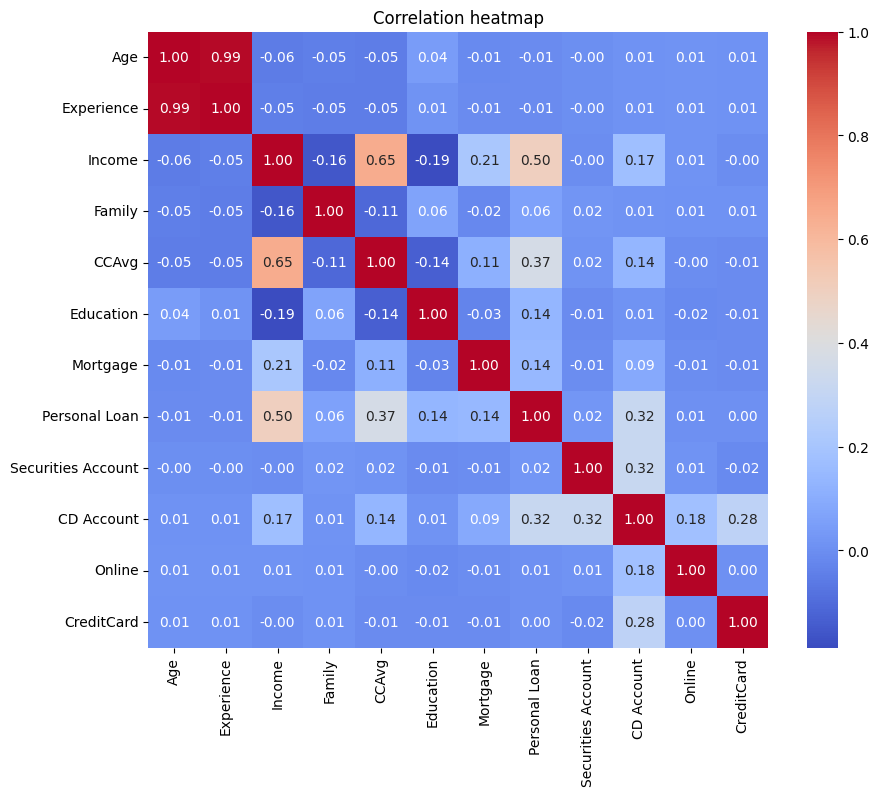

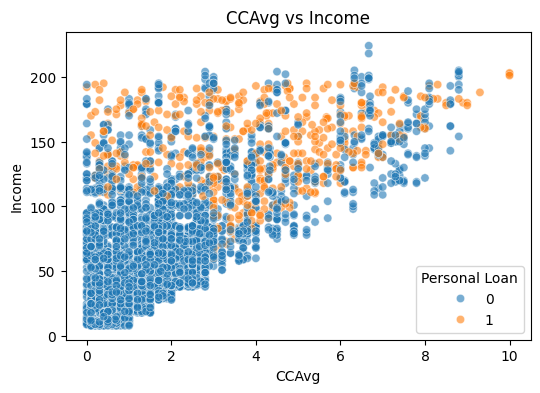

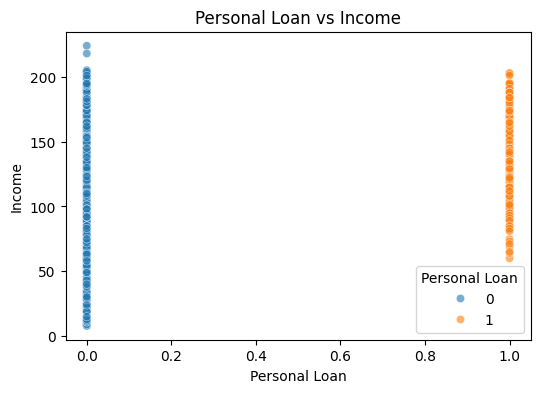

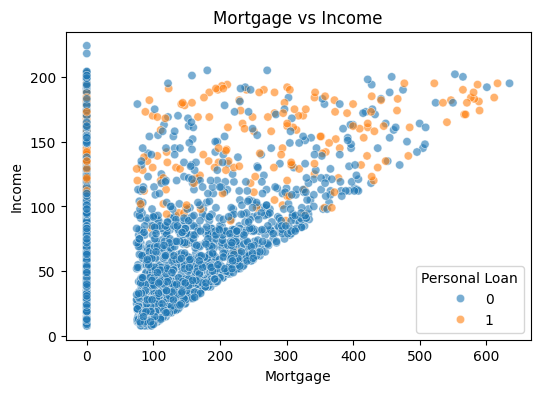

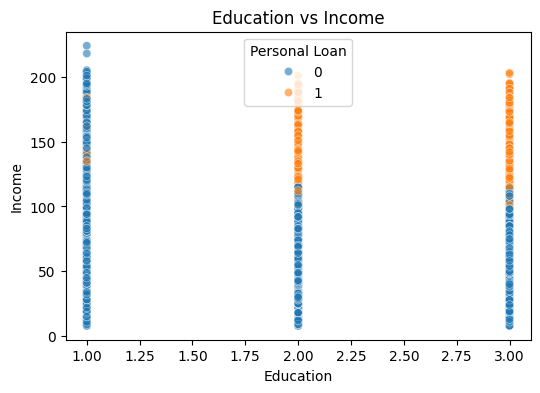

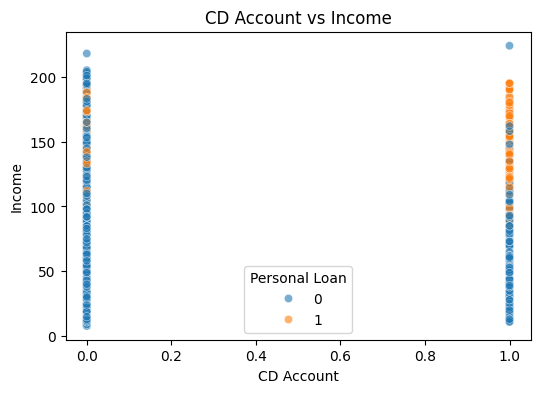

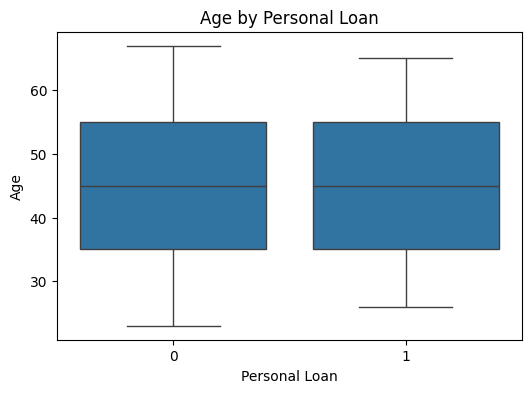

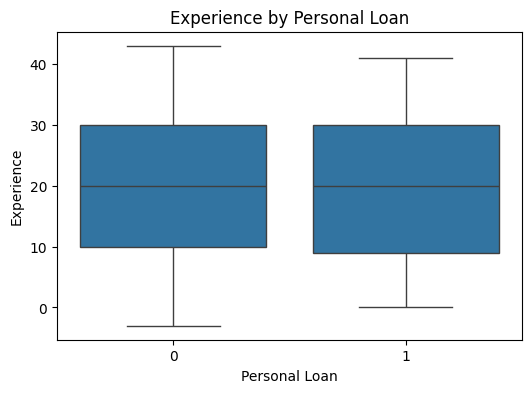

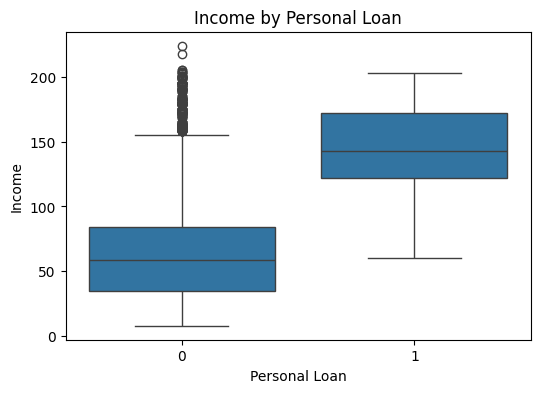

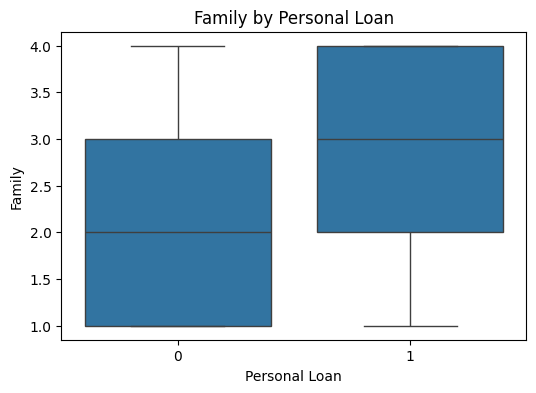

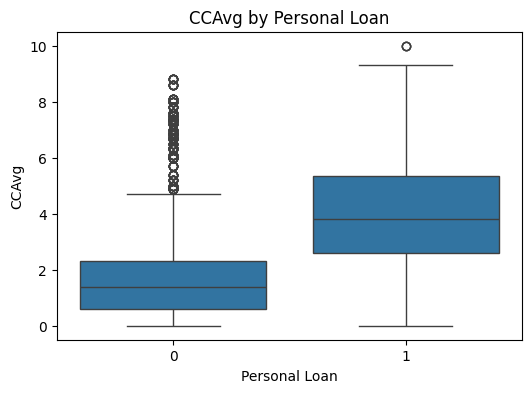

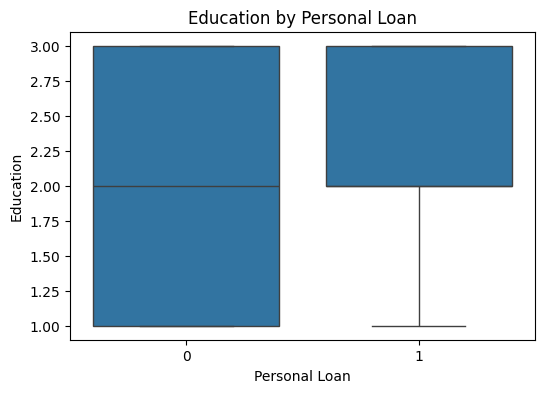

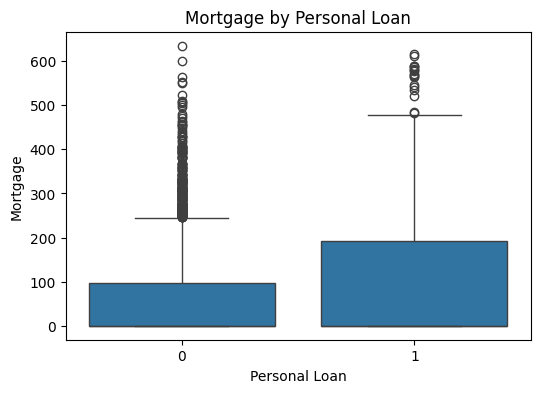

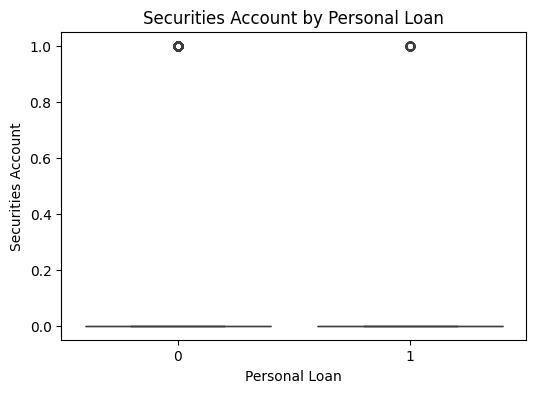

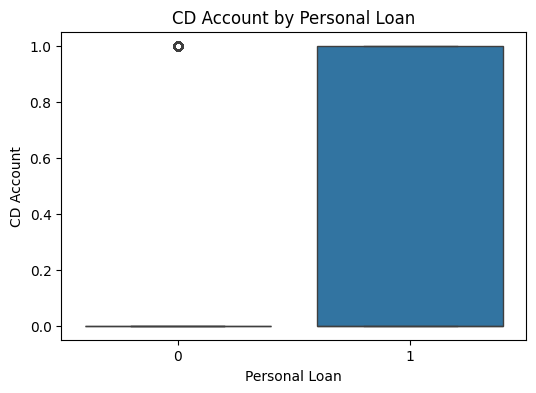

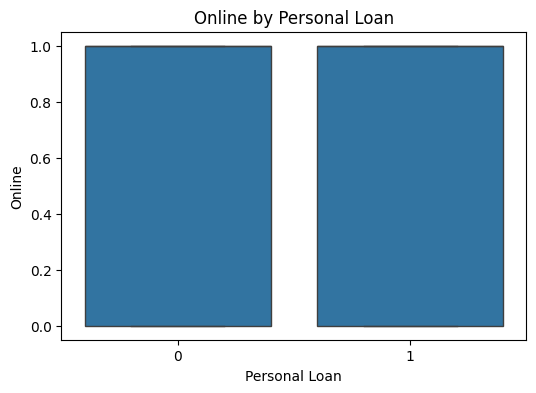

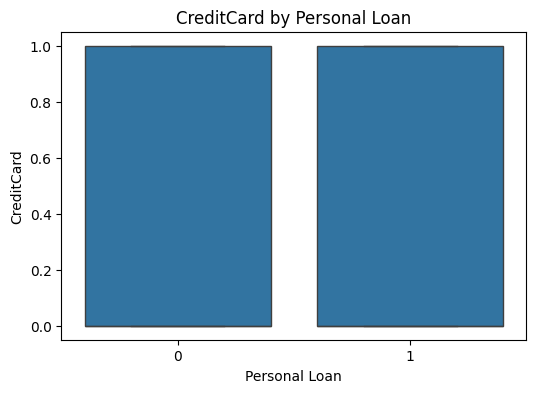

In [ ]:
# ---------- 4. 2D Visualizations (Relationships) ----------
print('\n--- 2D Visualizations (scatter, boxplots, heatmap) ---')
# Correlation heatmap
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()


# Scatter plots for top correlated features with Income and CCAvg
if 'Income' in df.columns:
  top = corr['Income'].abs().sort_values(ascending=False).index[1:6]
  for t in top:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[t], y=df['Income'], hue=df['Personal Loan'], alpha=0.6)
    plt.title(f'{t} vs Income')
    plt.show()


# Boxplots of numeric by target
for num in df.select_dtypes(include=[np.number]).columns:
  if num == 'Personal Loan':
    continue
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df['Personal Loan'], y=df[num])
  plt.title(f'{num} by Personal Loan')
  plt.show()


--- N-D Visualization (pairplot sample + PCA 2D scatter) ---


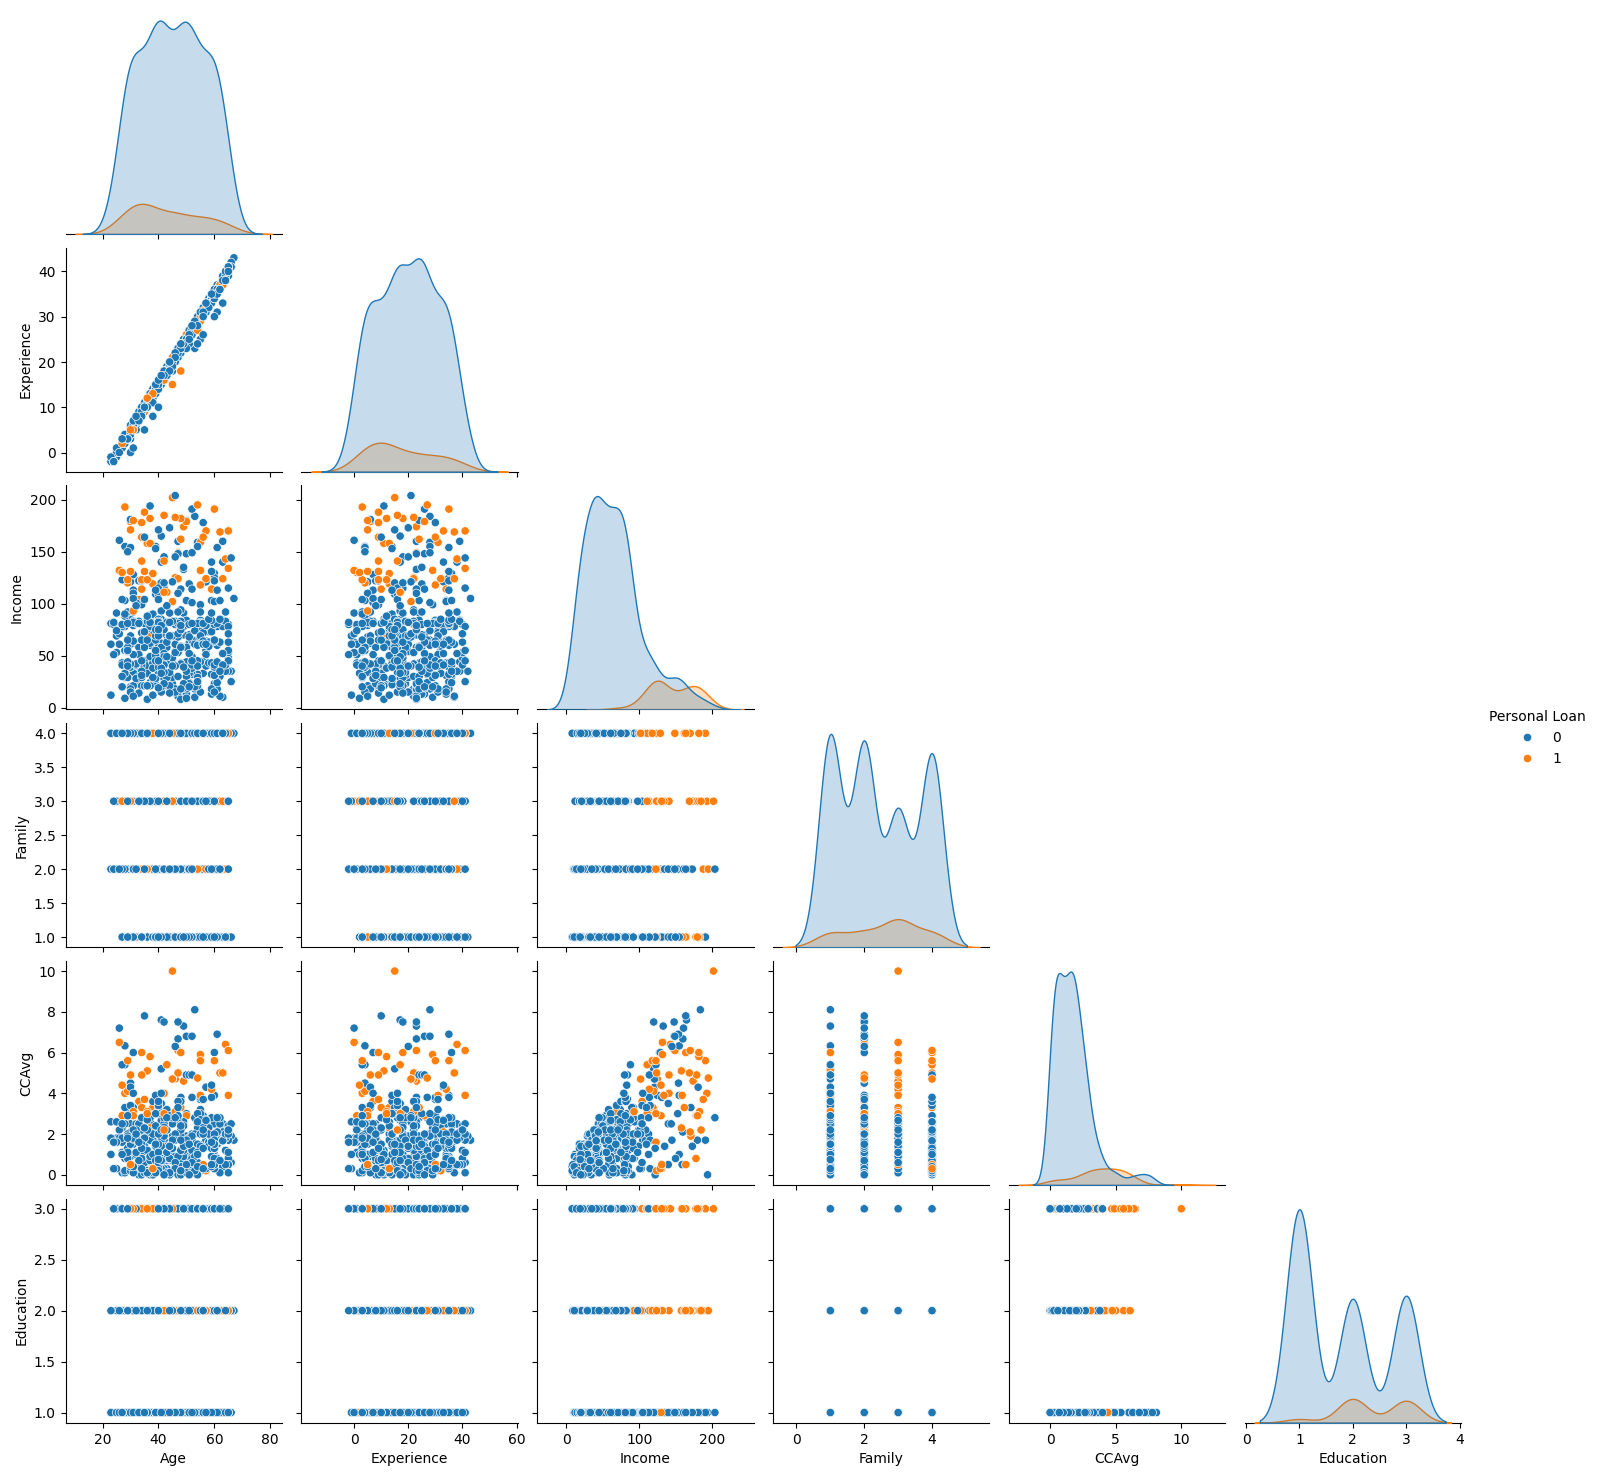

In [ ]:
# ---------- 5. N-D Visualization (Pairplot / PCA projection) ----------
print('\n--- N-D Visualization (pairplot sample + PCA 2D scatter) ---')
# Pairplot on a small subset to avoid heavy plotting
sample = df.sample(n=min(500, len(df)), random_state=42)
sns.pairplot(sample.select_dtypes(include=[np.number]).iloc[:, :6].assign(**{'Personal Loan': sample['Personal Loan']}),
hue='Personal Loan', corner=True)
plt.show()

In [ ]:
# ---------- 6. Time-series Analysis ----------
print('\n--- Time-series Analysis ---')
print('No datetime column detected;')


--- Time-series Analysis ---
No datetime column detected;


In [ ]:
# ---------- 7. Analysis of 1D, 2D and N-D data (brief stats) ----------
print('\n--- Univariate statistics ---')
print(df.describe().T)


print('\n--- Skewness ---')
print(df.skew().sort_values(ascending=False))


--- Univariate statistics ---
                     count       mean         std   min   25%   50%    75%  \
Age                 5000.0  45.338400   11.463166  23.0  35.0  45.0   55.0   
Experience          5000.0  20.104600   11.467954  -3.0  10.0  20.0   30.0   
Income              5000.0  73.774200   46.033729   8.0  39.0  64.0   98.0   
Family              5000.0   2.396400    1.147663   1.0   1.0   2.0    3.0   
CCAvg               5000.0   1.937938    1.747659   0.0   0.7   1.5    2.5   
Education           5000.0   1.881000    0.839869   1.0   1.0   2.0    3.0   
Mortgage            5000.0  56.498800  101.713802   0.0   0.0   0.0  101.0   
Personal Loan       5000.0   0.096000    0.294621   0.0   0.0   0.0    0.0   
Securities Account  5000.0   0.104400    0.305809   0.0   0.0   0.0    0.0   
CD Account          5000.0   0.060400    0.238250   0.0   0.0   0.0    0.0   
Online              5000.0   0.596800    0.490589   0.0   0.0   1.0    1.0   
CreditCard          5000.0   0.29


--- PCA: dimensionality reduction ---
Explained variance ratio (first components): [0.18622775 0.16876493 0.12857527 0.09237859 0.09066752 0.08940715]


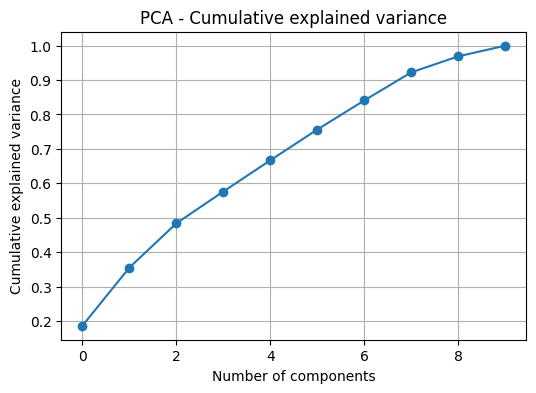

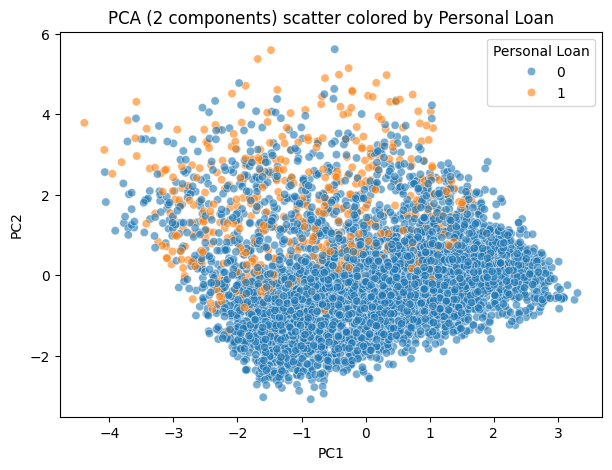

In [ ]:
# ---------- 8. Dimensionality reduction - PCA ----------
print('\n--- PCA: dimensionality reduction ---')
features = [c for c in df.columns if c != 'Personal Loan']
X = df[features].copy()
y = df['Personal Loan'].copy()


# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=min(10, X_scaled.shape[1]))
X_pca = pca.fit_transform(X_scaled)


# Explained variance
explained = pca.explained_variance_ratio_
print('Explained variance ratio (first components):', explained[:6])


plt.figure(figsize=(6,4))
plt.plot(np.cumsum(explained), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA - Cumulative explained variance')
plt.grid(True)
plt.show()


# 2D PCA scatter
if X_pca.shape[1] >= 2:
  plt.figure(figsize=(7,5))
  sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, alpha=0.6)
  plt.title('PCA (2 components) scatter colored by Personal Loan')
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.show()

In [ ]:
# ---------- 9. Model building - Classification (Personal Loan) ----------
print('\n--- Model building & Evaluation (Classification) ---')


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)
y_prob_lr = logreg.predict_proba(X_test_scaled)[:,1]


# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]


--- Model building & Evaluation (Classification) ---



--- Logistic Regression ---
Accuracy: 0.952
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.82      0.64      0.72       144

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



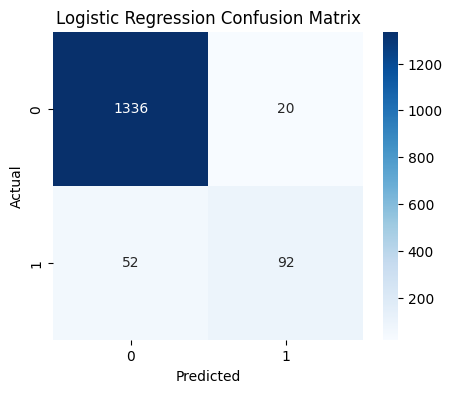


--- Random Forest ---
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.92      0.95       144

    accuracy                           0.99      1500
   macro avg       0.98      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500



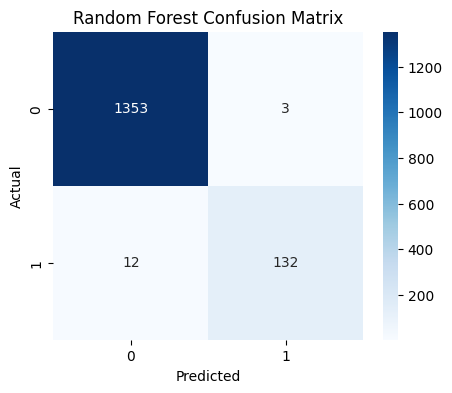

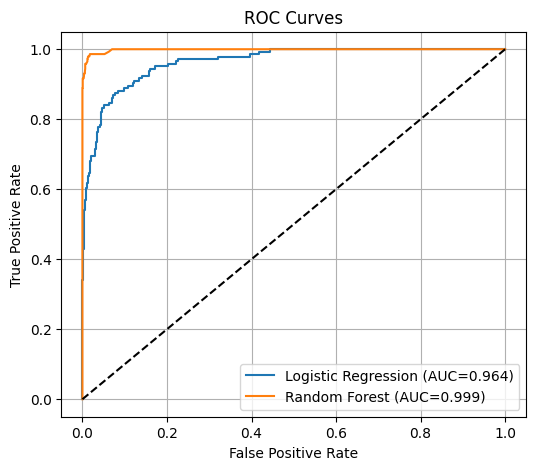

In [ ]:
# ---------- 10. Evaluation ----------
models = {
    "Logistic Regression": (y_pred_lr, y_prob_lr),
    "Random Forest": (y_pred_rf, y_prob_rf)
}

for name, (y_pred, y_prob) in models.items():
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    show_confusion_matrix(y_test, y_pred, title=f"{name} Confusion Matrix")


# ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(6,5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={roc_auc_score(y_test,y_prob_lr):.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_score(y_test,y_prob_rf):.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()
